Accuracy: 0.83


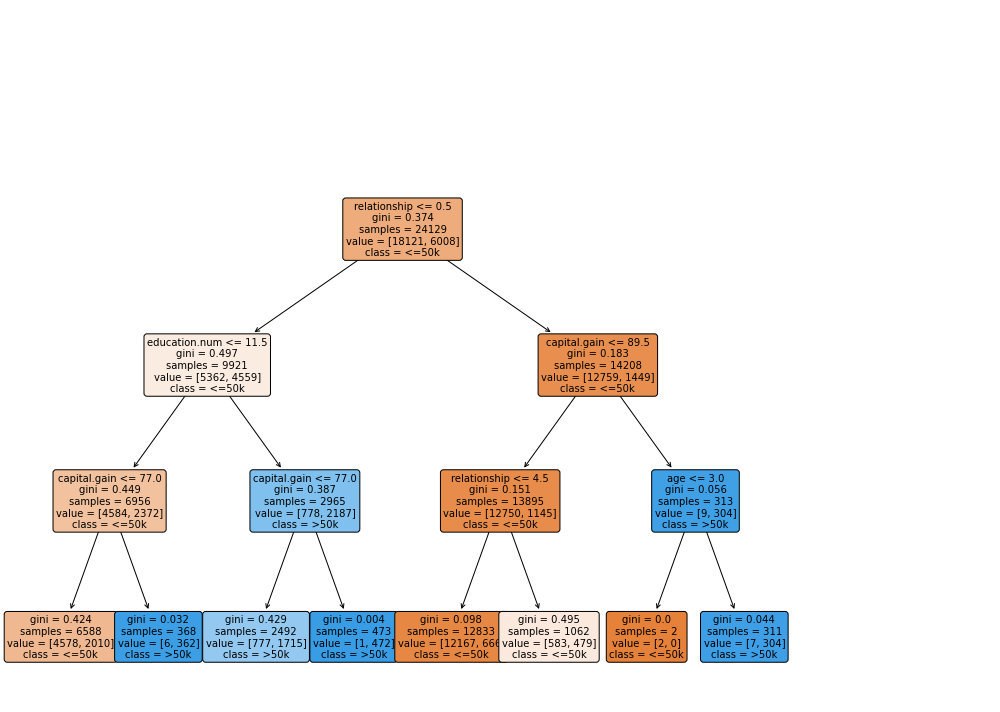

In [1]:
#Name: Taslim Ansari
#UIN: 221P010
#Roll No: 03
#Aim: implementation of a decision tree <3

# ------------------ Required Libraries ------------------

# For handling datasets
import pandas as pd
# For numerical operations, handling missing values
import numpy as np
# For plotting the decision tree
import matplotlib.pyplot as plt
# For splitting the dataset
from sklearn.model_selection import train_test_split
# For training and visualizing a Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# For calculating model accuracy
from sklearn.metrics import accuracy_score
# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


# ------------------ Load and Clean Data ------------------

# Load dataset from CSV file
df = pd.read_csv("adult_dataset.csv")

# Replace '?' with NaN and drop rows with missing values
df = df.replace('?', np.nan).dropna()

# Encode categorical variables into numeric
df = df.apply(LabelEncoder().fit_transform)

# Split dataset into features (X) and target (y)
X = df.drop("income", axis=1)   # Features (all except 'income')
y = df["income"]                # Target column


# ------------------ Train-Test Split ------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ------------------ Train Decision Tree ------------------

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# ------------------ Model Evaluation ------------------

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


# ------------------ Plot Decision Tree ------------------

plt.figure(figsize=(14, 10))
plt.title("Decision Tree Visualization by BE COMPUTER ENGG.", color="purple")

plot_tree(
    model,
    feature_names=X.columns.tolist(),   # Feature names
    class_names=["<=50k", ">50k"],      # Class labels
    filled=True,
    rounded=True,
    fontsize=10
)

plt.tight_layout()
plt.show()


In [2]:
# ------------------ Import Libraries ------------------
import tkinter as tk  # Tkinter for GUI components
from tkinter import messagebox  # For popup messages
import numpy as np  # For handling input as arrays


# ------------------ Prediction Function ------------------
def predict_income():
    try:
        # Read values from each entry box and convert to integers
        # (Order must match model's expected features)
        values = [int(entry.get()) for entry in entries]

        # Convert to 2D array (since model expects 2D input)
        input_data = np.array(values).reshape(1, -1)

        # Predict using trained model
        prediction = model.predict(input_data)

        # Show result
        result = "<=50K" if prediction[0] == 0 else ">50K"
        messagebox.showinfo("Prediction Result", f"Predicted Income: {result}")

    except Exception as e:
        # Handle errors (e.g., wrong input type)
        messagebox.showerror("Error", f"Invalid input: {e}")


# ------------------ GUI Setup ------------------
# Feature names (exclude 'income' column)
features = X.columns.tolist()

# Create the main window
root = tk.Tk()
root.title("Income Prediction GUI")

entries = []  # Store input boxes

# Dynamically create labels and entries for features
for i, feature in enumerate(features):
    tk.Label(root, text=feature).grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Predict Button
tk.Button(
    root,
    text="Predict Income",
    command=predict_income,
    bg="purple",
    fg="white",
    font=("Arial", 10, "bold")
).grid(row=len(features), column=0, columnspan=2, pady=20)

# Start the GUI loop
root.mainloop()


First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

Accuracy: 100.00%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00     

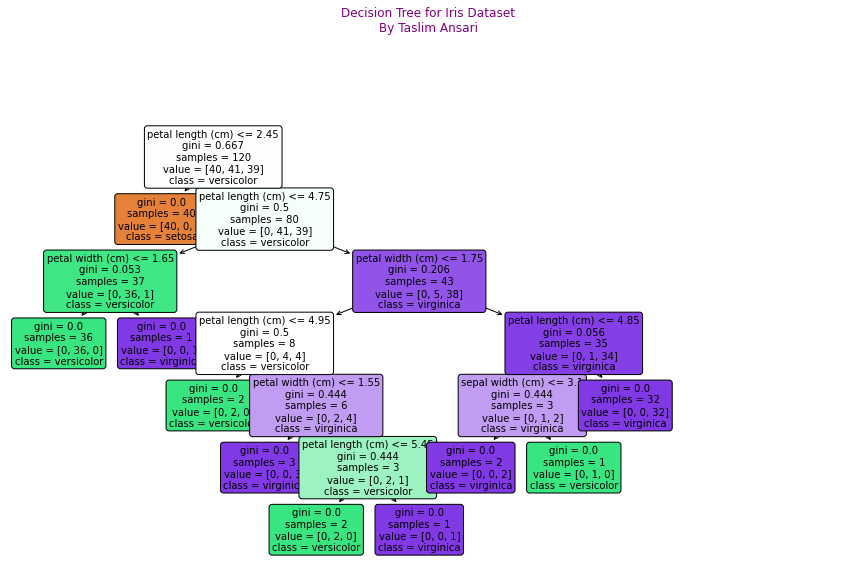


Feature Importances:
sepal length (cm): 0.00
sepal width (cm): 0.02
petal length (cm): 0.91
petal width (cm): 0.08


In [4]:
# ------------------ Import Libraries ------------------
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt


# ------------------ 1. Load Dataset ------------------
iris = load_iris()
X, y = iris.data, iris.target  # Features and Labels

# Convert to DataFrame for better analysis
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])
print("First 5 rows of dataset:\n", df.head())


# ------------------ 2. Split Dataset ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ------------------ 3. Train Decision Tree ------------------
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# ------------------ 4. Make Predictions ------------------
y_pred = clf.predict(X_test)


# ------------------ 5. Evaluate Model ------------------
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


# ------------------ 6. Visualize Decision Tree ------------------
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset\nBy Taslim Ansari", color="purple")
plt.tight_layout()
plt.show()


# ------------------ 7. Feature Importance ------------------
print("\nFeature Importances:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.2f}")
